# Adaptive thumbnails

The usual prelims...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load an image

Start with a CC-BY image from Flickr/[Green Optics](https://www.flickr.com/photos/60548141@N00/8326425318). [This one](https://www.flickr.com/photos/meddygarnet/6389989407) is another option.

In [3]:
import requests
from PIL import Image
from io import BytesIO

In [4]:
url = "https://farm9.staticflickr.com/8076/8326425318_3721a23141_b_d.jpg"
r = requests.get(url)
im = Image.open(BytesIO(r.content))

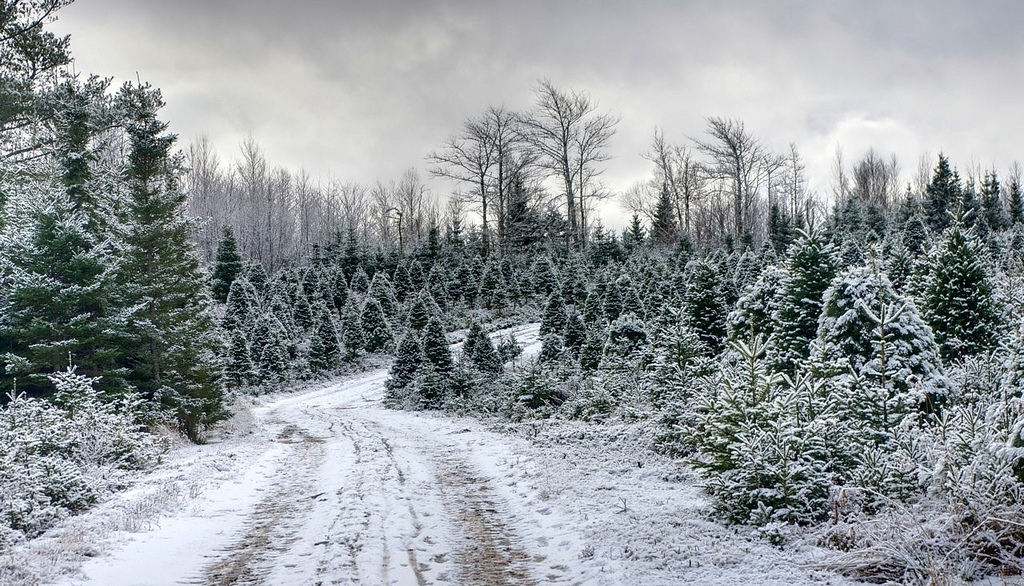

In [12]:
im

## Smart cropping

The idea is to take a segment of the image that shares the aspect ratio of the input, to a point (we don't want very tall or thin images... unless the image is very small and we can't do any better).

In [114]:
from PIL import Image
from PIL import ImageFile

def thumb(img, thumb_width=256, max_size=512, max_aspect=2):
    """
    Crop an image to some sensible shape in the centre
    of the original. Pass in a size and aspect if you want.
    Size is applied to the width. Aspect is applied as a
    max (eg 2 is twice as wide as tall) and as a min (1/2).
    """
    width, height = img.size
    aspect = width / height
    print("Orig aspect = {}".format(aspect))

    # Clip aspect ratio
    new_aspect = max(min(max_aspect, aspect), 1/max_aspect)

    # Clip size
    new_width = min(max_size, width)
    new_height = new_width / new_aspect
    if height < new_height:
        new_height = height
        new_aspect = new_width / new_height
    print("New aspect  = {}".format(new_aspect))
    print("New size    = w {}, h {}".format(new_width, new_height))

    # Define the box and crop
    x = int(width/2 - new_width/2)
    y = int(height/2 - new_height/2)
    w = int(width/2 + new_width/2)
    h = int(height/2 + new_height/2)
    box = (x, y, w, h)
    img = img.crop(box)

    thumb_height = int(thumb_width / new_aspect)
    img = img.resize((thumb_width, thumb_height), Image.ANTIALIAS)

    destination = "data/test.jpeg"
    try:
        img.save(destination, "JPEG", quality=80, optimize=True, progressive=True)
    except IOError:
        ImageFile.MAXBLOCK = thumb_width * thumb_height
        img.save(destination, "JPEG", quality=80, optimize=True, progressive=True)

    return img  # This is the img

## Test it

Orig aspect = 1.7474402730375427
New aspect  = 1.7474402730375427
New size    = w 512, h 293.0


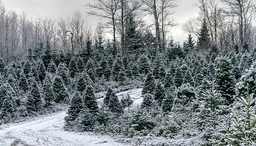

In [115]:
newimg = thumb(im)
newimg

In [116]:
newimg.size

(256, 146)

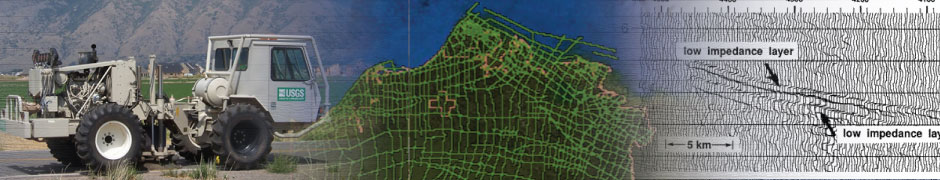

In [117]:
very_wide = Image.open("data/crop_very_wide.jpg")
very_wide

In [118]:
very_wide.size

(940, 180)

Orig aspect = 5.222222222222222
New aspect  = 2.8444444444444446
New size    = w 512, h 180


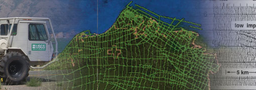

In [119]:
thumb(very_wide)

Orig aspect = 0.21046511627906977
New aspect  = 0.5
New size    = w 512, h 1024.0


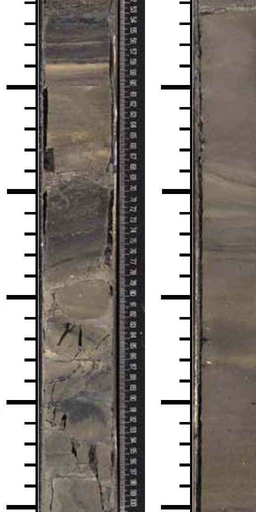

In [120]:
very_tall = Image.open("data/crop_very_tall.jpg")
thumb(very_tall)